# Exploratory Data Analysis of Piano Dataset

### References
* Piano Dataset: http://imanmalik.com/assets/dataset/TPD.zip
* Paper: https://arxiv.org/abs/1708.03535
* ToneNet Article: https://towardsdatascience.com/tonenet-a-musical-style-transfer-c0a18903c910
* midi2img: https://github.com/mathigatti/midi2img

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from midi2img.midi2img import Midi2Img
from midi2img.img2midi import Img2Midi
from music21 import midi

## Visualization
Sample data visualization

In [2]:
mf = midi.MidiFile()
mf.open("data/TPD/classical/ADIG01.mid") # path='abc.midi'
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

Convert a sample midi file into a binary image

In [3]:
mid = Midi2Img("data/TPD/classical/ADIG01.mid")

In [4]:
mid.instruments_list()

['Piano']

In [5]:
im_list = mid.midi2image()

In [6]:
print(im_list)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]


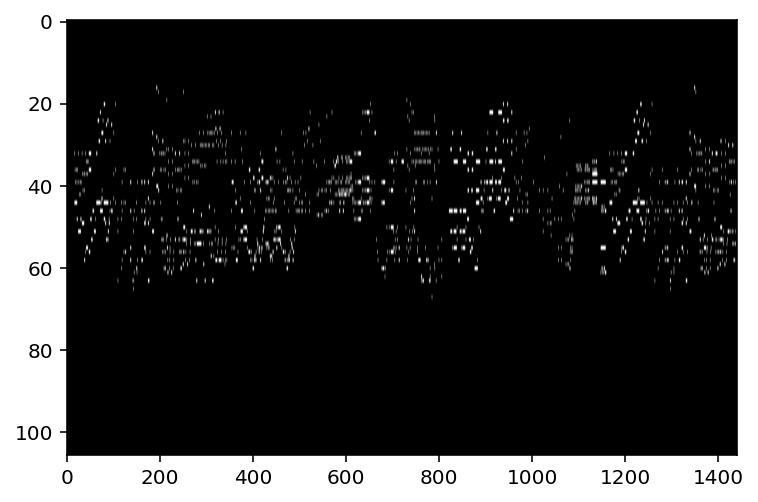

In [7]:
for img in im_list:
    plt.imshow(img, cmap="gray",aspect="auto")

Loop through the classical dataset

In [8]:
data_dir = 'data/TPD/classical'
classical = []
num_files = len(os.listdir(data_dir))
i = 1
for filename in os.listdir(data_dir):
    if filename.endswith('.mid'):
        try:
            mid = Midi2Img(os.path.join(data_dir, filename))
            classical.append(mid)
        except:
            print("Midi file could not be read: ", filename)
        print("Processed {} out of {}".format(i, num_files))
        i += 1
        if i > 5:
            break
classical

Processed 1 out of 349
Processed 2 out of 349
Processed 3 out of 349
Processed 4 out of 349
Processed 5 out of 349


In [9]:
data_dir = 'data/TPD/jazz'
jazz = []
num_files = len(os.listdir(data_dir))
i = 1
for filename in os.listdir(data_dir):
    if filename.endswith('.mid'):
        try:
            mid = Midi2Img(os.path.join(data_dir, filename))
            jazz.append(mid)
        except:
            print("Midi file could not be read: ", filename)
        print("Processed {} out of {}".format(i, num_files))
        i += 1
        if i > 5:
            break
jazz

Processed 1 out of 349
Processed 2 out of 349
Processed 3 out of 349
Processed 4 out of 349
Processed 5 out of 349


In [10]:
classical[0].length

653.4713628520714

In [11]:
clips = classical + jazz

In [12]:
clips = [x for x in clips if x.length > 180]

In [13]:
clips

In [14]:
img_list = []
for clip in clips:
    im_list_clip = clip.midi2image("output")
    img_list.append(im_list_clip[0])

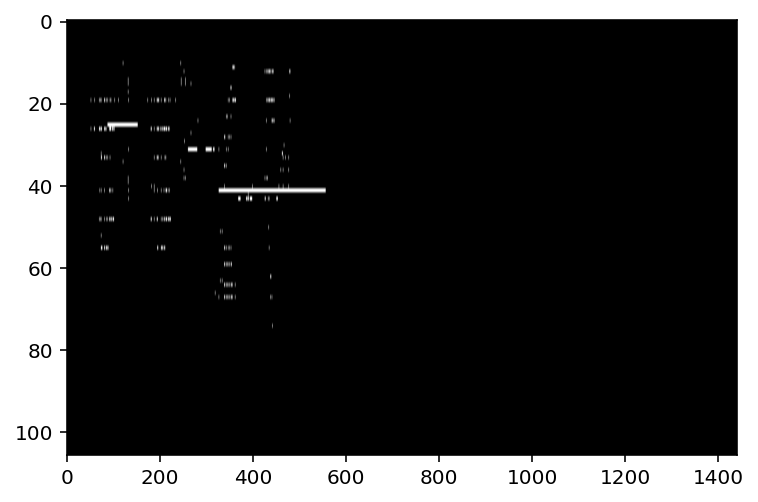

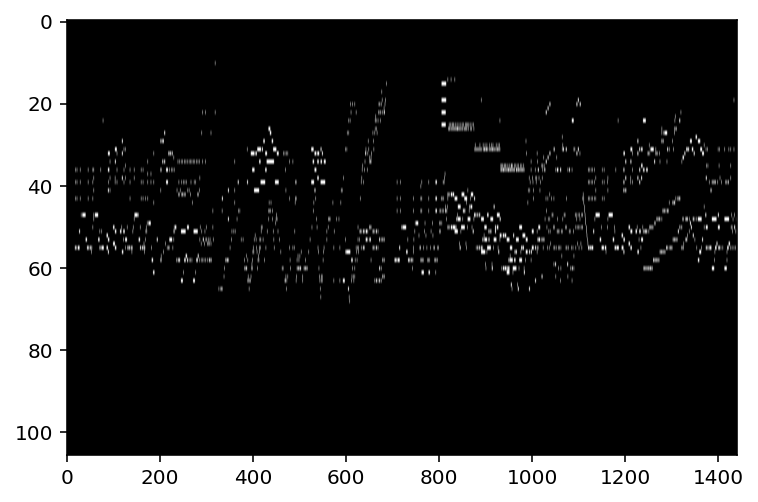

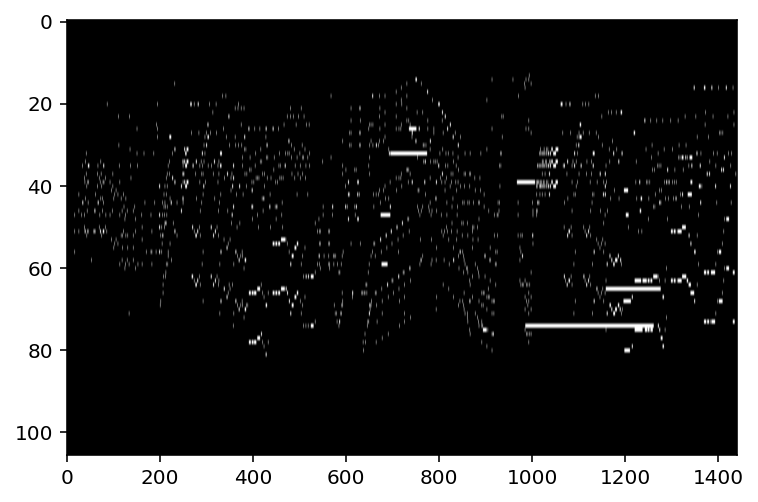

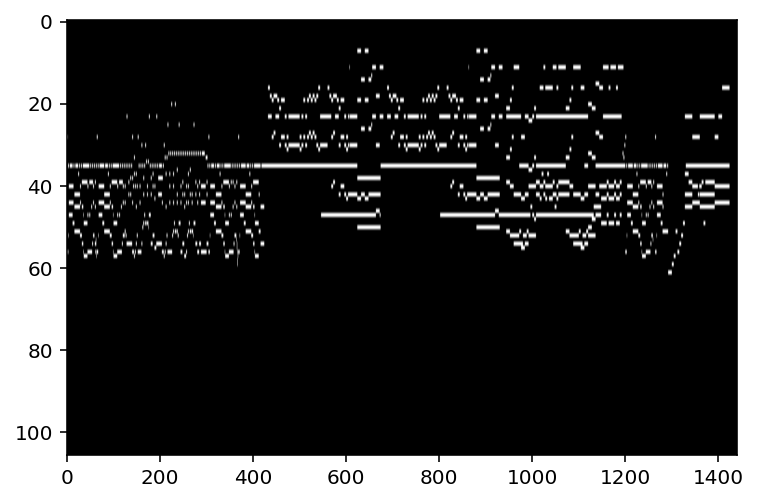

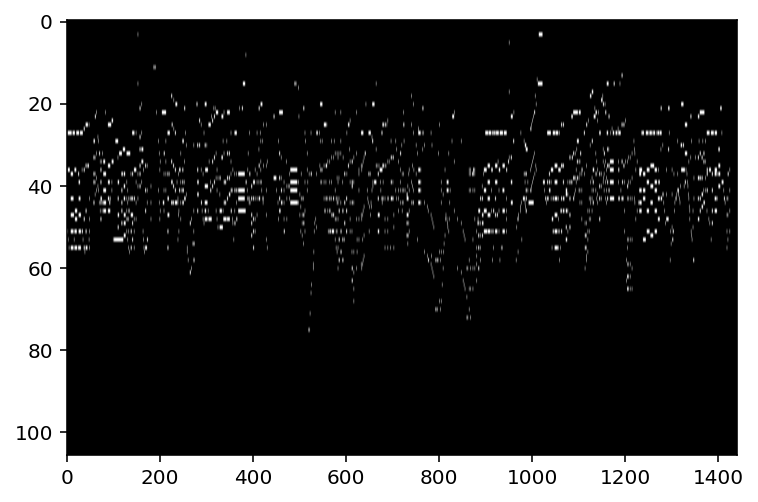

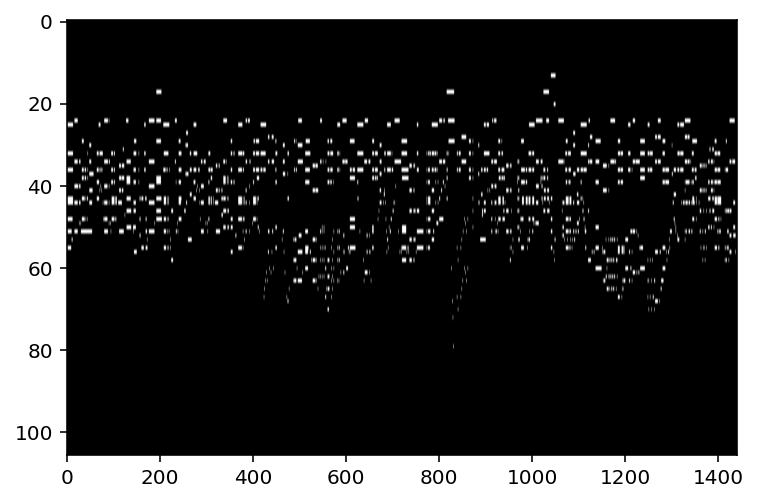

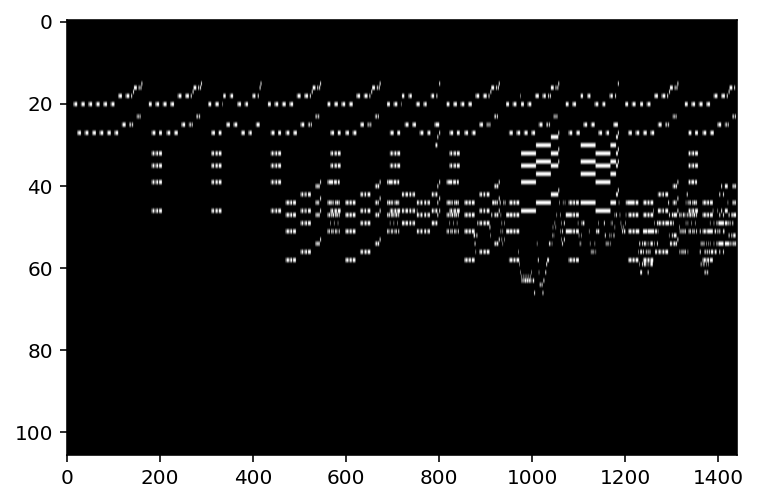

In [15]:
for img in img_list:
    plt.imshow(img, cmap="gray",aspect="auto")
    plt.show()

In [16]:
i2m = Img2Midi("output/MCVEY02_Piano_0.png")

(106, 1440)


In [17]:
midi_path = i2m.image2midi()

In [18]:
mf = midi.MidiFile()
mf.open(midi_path) # path='abc.midi'
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

In [19]:
mf = midi.MidiFile()
mf.open("data/TPD/classical/MCVEY02.mid") # path='abc.midi'
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

Lossy conversion. Original MIDI

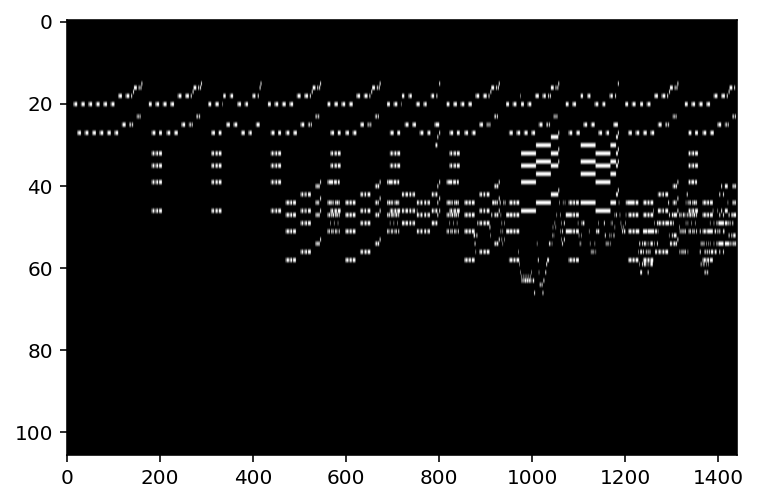

In [20]:
mid = Midi2Img(midi_path)
im_list_clip = clip.midi2image("output_2")
plt.imshow(im_list_clip[0], cmap="gray",aspect="auto")
plt.show()

In [21]:
i2m = Img2Midi("output_2/songfor_Piano_0.png")
midi_path = i2m.image2midi()
mf = midi.MidiFile()
mf.open(midi_path) # path='abc.midi'
mf.read()
mf.close()
s = midi.translate.midiFileToStream(mf)
s.show('midi')

(106, 1440)
